In [86]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from random import uniform, choice
%matplotlib inline

In [87]:
# Calculate sign
def sign(f, data):
    if np.dot(f, data) >= 0:
        return 1
    else:
        return -1

In [88]:
# Generate dataset
def generate_data(N, d, target_f):
    data = np.random.uniform(-1, 1, (N, d + 1))
    data[:, 0] = 1
    label = np.ones(N)
    for i in range(N):
        label[i] = sign(target_f, data[i])
    return data, label

In [89]:
# Plot line
def plot_line(f, lab, col):
    x = np.arange(-1, 1, 0.01)
    y = -f[0] / f[2] - f[1] * x / f[2]
    plot(x, y, label=lab, color=col)

In [90]:
def PLA(x, y):
    w = np.zeros(x.shape[1])
    num_update = 0
    flag = True
    while flag:
        flag = False
        for i in range(x.shape[0]):
            if sign(w, x[i]) * y[i] < 0:
                flag = True
                w += y[i] * x[i]
                num_update += 1
                break
    return w, num_update

In [152]:
def PLA_random(x, y):
    w = np.zeros(x.shape[1])
    num_update = 0
    flag = True
    while flag:
        misclassified_index = []
        for i in range(x.shape[0]):
            if sign(w, x[i]) * y[i] < 0:
                misclassified_index.append(i)
        if len(misclassified_index) == 0:
            flag = False
        else:
            i = choice(misclassified_index)
            w += y[i] * x[i]
            num_update += 1
    return w, num_update

In [91]:
def plot_data(x, y):
    for i in range(x.shape[0]):
        if y[i] == 1:
            plt.scatter(x[i][1], x[i][2], color='red')
        else:
            plt.scatter(x[i][1], x[i][2], color='blue')

In [153]:
def test(N, d):
# N = 20
# d = 2
    # Generate target line
#     x1 = uniform(-1, 1)
#     x2 = uniform(-1, 1)
#     y1 = uniform(-1, 1)
#     y2 = uniform(-1, 1)
    rand_point = np.random.uniform(-0.5, 0.5, d + 1)
    rand_point[0] = 1
    
    target_f = np.random.uniform(-1, 1, d + 1)
    target_f[0] = 0
    target_f[0] = -np.dot(rand_point, target_f)

    # Generate data
    x, y = generate_data(N, d, target_f)
#     w, num_iter = PLA(x, y)
    w, num_iter = PLA_random(x, y)
#     plt.xlim(-1, 1)
#     plt.ylim(-1, 1)
#     plot_line(w, "final hypothesis g", 'black')
#     plot_line(target_f, "target function", 'green')
#     plot_data(x, y)
    print("Number of iterations:",num_iter)
    return num_iter


Number of iterations: 169


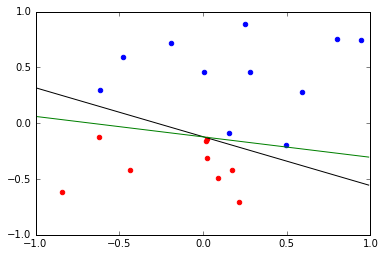

In [130]:
test(20, 2)

In [139]:
test(100, 2)

Number of iterations: 31


In [140]:
test(1000, 2)

Number of iterations: 168


In [141]:
test(1000, 10)

Number of iterations: 3007


In [154]:
num_iters = []
for i in range(100):
    num_iters.append(test(1000, 10))

Number of iterations: 4186
Number of iterations: 6780
Number of iterations: 5813
Number of iterations: 3391
Number of iterations: 7708
Number of iterations: 2151
Number of iterations: 3660
Number of iterations: 15067
Number of iterations: 6041
Number of iterations: 5582
Number of iterations: 3389
Number of iterations: 6121
Number of iterations: 16543
Number of iterations: 10316
Number of iterations: 2684
Number of iterations: 5482
Number of iterations: 2023
Number of iterations: 6335
Number of iterations: 2589
Number of iterations: 3922
Number of iterations: 7908
Number of iterations: 4379
Number of iterations: 5128
Number of iterations: 2641
Number of iterations: 4394
Number of iterations: 5672
Number of iterations: 785
Number of iterations: 15619
Number of iterations: 4291
Number of iterations: 5897
Number of iterations: 6513
Number of iterations: 9802
Number of iterations: 3082
Number of iterations: 6390
Number of iterations: 4277
Number of iterations: 3937
Number of iterations: 467

(array([ 21.,  31.,  25.,   9.,   6.,   2.,   3.,   0.,   2.,   1.]),
 array([   785. ,   3058.3,   5331.6,   7604.9,   9878.2,  12151.5,
         14424.8,  16698.1,  18971.4,  21244.7,  23518. ]),
 <a list of 10 Patch objects>)

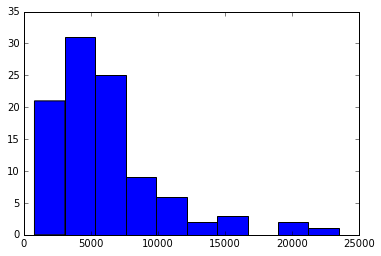

In [155]:
plt.hist(num_iters)

number of updates ~ $O(Nd)$